In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_csv('groceries.csv',sep='/t',header=None, engine='python')

In [3]:
df

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [4]:
df = df[0].str.split(',', expand=True)

In [5]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,whole milk,butter,yogurt,rice,abrasive cleaner,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,rolls/buns,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,potted plants,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,whole milk,cereals,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
 1   1       7676 non-null   object
 2   2       6033 non-null   object
 3   3       4734 non-null   object
 4   4       3729 non-null   object
 5   5       2874 non-null   object
 6   6       2229 non-null   object
 7   7       1684 non-null   object
 8   8       1246 non-null   object
 9   9       896 non-null    object
 10  10      650 non-null    object
 11  11      468 non-null    object
 12  12      351 non-null    object
 13  13      273 non-null    object
 14  14      196 non-null    object
 15  15      141 non-null    object
 16  16      95 non-null     object
 17  17      66 non-null     object
 18  18      52 non-null     object
 19  19      38 non-null     object
 20  20      29 non-null     object
 21  21      18 non-null     object
 22  22      14 non-null     

In [7]:
import numpy as np
basket = np.array(df)
basket


array([['citrus fruit', 'semi-finished bread', 'margarine', ..., None,
        None, None],
       ['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], dtype=object)

In [8]:
basket = [[x for x in row if str(x)!='None'] for row in basket]
basket

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [9]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_arr = te.fit(basket).transform(basket).astype(int)
dt=pd.DataFrame(te_arr, columns=te.columns_)
dt

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#APRIORI

In [11]:
import time
Apriori_results = []
Apriori_execute_time = []
x=np.linspace(0.01,0.1,num=10)
x=np.round(x,2)
j=0
for i in (x):
    print("Minsup", i, ":")
    start_time = time.time()
    itemsets=apriori(dt.astype('bool'), min_support=i, use_colnames = True)
    end_time = time.time()
    Apriori_results.append(itemsets)
    Apriori_execute_time.append(end_time-start_time)
    print(Apriori_results[j])
    j=j+1

Minsup 0.01 :
      support                                       itemsets
0    0.033452                                     (UHT-milk)
1    0.017692                                (baking powder)
2    0.052466                                         (beef)
3    0.033249                                      (berries)
4    0.026029                                    (beverages)
..        ...                                            ...
328  0.011998  (root vegetables, whole milk, tropical fruit)
329  0.014540          (root vegetables, whole milk, yogurt)
330  0.010473                     (whole milk, yogurt, soda)
331  0.015150           (whole milk, yogurt, tropical fruit)
332  0.010880       (whipped/sour cream, whole milk, yogurt)

[333 rows x 2 columns]
Minsup 0.02 :
      support                                         itemsets
0    0.033452                                       (UHT-milk)
1    0.052466                                           (beef)
2    0.033249              

#FP-Growth

In [12]:
import time
from mlxtend.frequent_patterns import fpgrowth
fpgrowth_results = []
fpgrowth_execute_time = []
x=np.linspace(0.01,0.1,num=10)
x=np.round(x,2)
j=0
for i in (x):
    print("Minsup", i, ":")
    start_time = time.time()
    itemsets=fpgrowth(dt.astype('bool'), min_support=i, use_colnames = True)
    end_time = time.time()
    fpgrowth_results.append(itemsets)
    fpgrowth_execute_time.append(end_time-start_time)
    print(fpgrowth_results[j])
    j=j+1


Minsup 0.01 :
      support                         itemsets
0    0.082766                   (citrus fruit)
1    0.058566                      (margarine)
2    0.017692            (semi-finished bread)
3    0.139502                         (yogurt)
4    0.104931                 (tropical fruit)
..        ...                              ...
328  0.010168  (frozen vegetables, rolls/buns)
329  0.012405      (frozen vegetables, yogurt)
330  0.014235       (onions, other vegetables)
331  0.012100             (onions, whole milk)
332  0.010778      (whole milk, sliced cheese)

[333 rows x 2 columns]
Minsup 0.02 :
      support                           itemsets
0    0.082766                     (citrus fruit)
1    0.058566                        (margarine)
2    0.139502                           (yogurt)
3    0.104931                   (tropical fruit)
4    0.058058                           (coffee)
..        ...                                ...
117  0.022166                 (pork, whol

In [13]:
data = {'Execute time of Apriori': Apriori_execute_time, 'Execute time of FP-Growth': fpgrowth_execute_time}
table = pd.DataFrame(data, x)
table

,Execute time of Apriori,Execute time of FP-Growth
0.01,0.253453,0.157675
0.02,0.093306,0.166364
0.03,0.068671,0.128577
0.04,0.029670,0.110883
0.05,0.030472,0.083709
0.06,0.015720,0.060231
0.07,0.015636,0.135402
0.08,0.019755,0.049575
0.09,0.002484,0.037588
0.10,0.014019,0.056039


In [15]:
#Vẽ biểu đồ execute time

In [17]:
label=['0.01','0.02','0.03','0.04','0.05','0.06','0.07','0.08','0.09','0.1']


In [18]:
plt.figure(figsize=(15,7))

<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

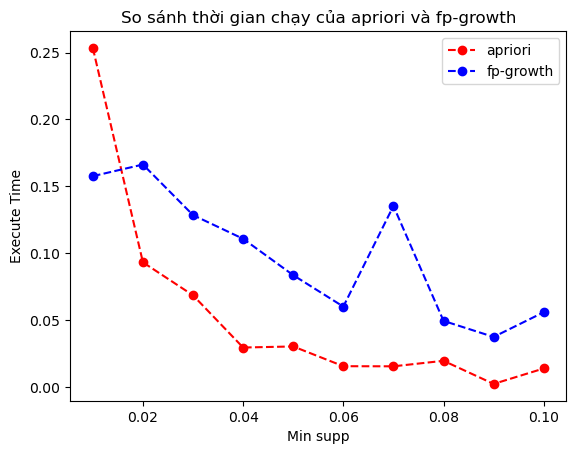

In [21]:
plt.plot(x, Apriori_execute_time, color='r', marker='o', label='apriori', linestyle='dashed')
plt.plot(x, fpgrowth_execute_time, color='b', marker='o', label='fp-growth', linestyle='dashed')
plt.title('So sánh thời gian chạy của apriori và fp-growth')
plt.xlabel('Min supp')
plt.ylabel('Execute Time')
plt.legend()
plt.show()

In [ ]:
#Nhận xét
- Ban đầu khi Min_supp = 0.01 thì thuật toán FP-Growth tốn ít thời gian hơn so với thuật toán Aprior
- Dần dần về sau khi Min_supp tăng dần lên thì thuật toán Aprior chạy nhanh hơn thuật toán FP-Growth
#Giải thích
- Vì khi min_sup càng lớn thì thì sẽ giúp ta loại bớt những giá trị không thỏa yêu cầu nhanh hơn và tìm được tập phổ biến cuối cùng nhanh hơn. 